In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
from module.EDA import *

In [2]:
DATA_ROOT = 'dataset'
DATA_NAME = 'train_data.txt'
DATA_PATH = os.path.join(DATA_ROOT, DATA_NAME)

text_raw = get_test_file_as_list(DATA_PATH)
text_clean = get_clean_text(text_raw)
n_data = len(text_clean)

word_count_dic = get_word_count_dic(text_clean)
ner_count_dic = get_ner_count_dic(text_clean)

vocab_size = len(word_count_dic)
sentence_length = [len(sentence) for sentence in text_clean]
count_word = [value for value in word_count_dic.values()]

1. text preview, n_line: 5 -----------------------------------------------------
-DOCSTART- -X- -X- O



EU NNP B-NP B-ORG

rejects VBZ B-VP O

German JJ B-NP B-MISC

--------------------------------------------------------------------------------


2. number of data --------------------------------------------------------------
14041
--------------------------------------------------------------------------------


3. vocab size ------------------------------------------------------------------
23623
--------------------------------------------------------------------------------


4. kinds of NER  ---------------------------------------------------------------
['B-ORG', 'O', 'B-MISC', 'B-PER', 'I-PER', 'B-LOC', 'I-ORG', 'I-MISC', 'I-LOC']
--------------------------------------------------------------------------------


5. hist of word count of each sentence -----------------------------------------


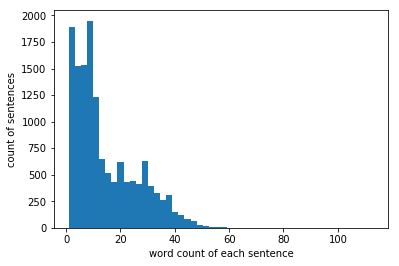

--------------------------------------------------------------------------------


6. describe word count of each sentence ----------------------------------------
mean: 14.501887329962253
std: 11.602342778538237
max: 113
min: 1
median: 10.0
25 percentile: 6.0
75 percentile: 22.0
--------------------------------------------------------------------------------


7. log hist of count of each word ----------------------------------------------


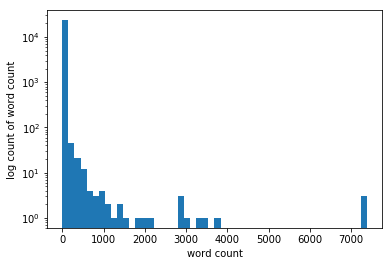

--------------------------------------------------------------------------------


8. describe count of each word -------------------------------------------------
mean: 8.619608009143631
std: 106.98889801400162
max: 7374
min: 1
median: 2.0
25 percentile: 1.0
75 percentile: 4.0
--------------------------------------------------------------------------------


9. bar plot of count by NER  ---------------------------------------------------


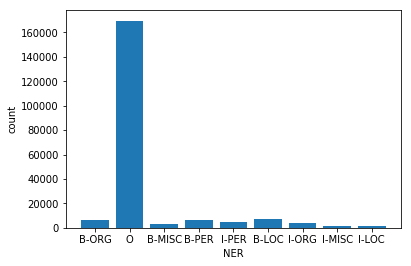

--------------------------------------------------------------------------------




In [3]:
division_length = 80
print("1. text preview, n_line: 5 ".ljust(division_length, '-'))
preview_text_file(DATA_PATH, n_line=5)
print("-" * division_length)
print()
print()

print("2. number of data ".ljust(division_length, '-'))
print(n_data)
print("-" * division_length)
print()
print()

print("3. vocab size ".ljust(division_length, '-'))
print(vocab_size)
print("-" * division_length)
print()
print()


print("4. kinds of NER  ".ljust(division_length, '-'))
print(list(ner_count_dic.keys()))
print("-" * division_length)
print()
print()

print("5. hist of word count of each sentence ".ljust(division_length, '-'))
plt.hist(sentence_length, bins=50)
plt.xlabel("word count of each sentence")
plt.ylabel("count of sentences")
plt.show()
print("-" * division_length)
print()
print()

print("6. describe word count of each sentence ".ljust(division_length, '-'))
print("mean:", np.mean(sentence_length))
print("std:", np.std(sentence_length))
print("max:", np.max(sentence_length))
print("min:", np.min(sentence_length))
print("median:", np.median(sentence_length))
print("25 percentile:", np.percentile(sentence_length, 25))
print("75 percentile:", np.percentile(sentence_length, 75))
print("-" * division_length)
print()
print()

print("7. log hist of count of each word ".ljust(division_length, '-'))
plt.hist(count_word, bins=50)
plt.yscale('log')
plt.xlabel("word count")
plt.ylabel("log count of word count")
plt.show()
print("-" * division_length)
print()
print()

print("8. describe count of each word ".ljust(division_length, '-'))
print("mean:", np.mean(count_word))
print("std:", np.std(count_word))
print("max:", np.max(count_word))
print("min:", np.min(count_word))
print("median:", np.median(count_word))
print("25 percentile:", np.percentile(count_word, 25))
print("75 percentile:", np.percentile(count_word, 75))
print("-" * division_length)
print()
print()

print("9. bar plot of count by NER  ".ljust(division_length, '-'))
x = []
y = []
for key, value in ner_count_dic.items():
    x.append(key)
    y.append(value)
plt.bar(x, y)
plt.xlabel("NER")
plt.ylabel("count")
plt.show()
print("-" * division_length)
print()
print()

# ESTSOFT NER DATA EDA

1. text preview
   - 주어진 텍스트는 [단어] [품사 태깅] [청크] [NER]으로 되어있다.
   - `-DOCSTART`라는 필요 없는 문자가 텍스트 중간중간에 나타난다.
   - 한 문장, 한 문장이 줄 바꿈으로 분리되어있다.
2. number of data
   - 우리가 사용할 수 있는 훈련 데이터는 총 14041개다.
3. vocab size
   - 훈련 데이터의 총 단어 개수는 21009개다.
4. kinds of NER
   - 훈련 데이터의 타겟 값에 해당하는 Named Entity는 총 9개다.
5. hist of word count of each sentence
   - 문장에 포함된 단어의 개수의 히스토그램을 살펴본 결과 대부분 문장이 70개 이하의 단어로 구성되어있음을 알 수 있다.
6. describe word count of each sentence
   - 문장에 포함된 단어의 개수의 최댓값은 113개이고 제3 사분위수는 22개이다. 
   - 대부분 문장이 70 단어 이하임을 고려하여 데이터를 BLSTM 모델에 넣기 전 input 데이터를 단어수를 70개로 패딩 하겠다.
7. log hist of count of each word
   - 각 단어의 출현 횟수의 로그 스케일링 히스토그램을 살펴봤을 때, 각 단어 별 출현 횟수가 많이 차이 난다는 것을 알 수 있다.
8. describe count of each word
    - 각 단어의 출현 횟수의 평균은 8 회지만 중위수는 2 회인 것으로 보아 오른쪽 꼬리가 긴 형태의 분포를 갖고 있다.
    - 객체명일 경우 count가 낮을 가능성이 높으므로, min count가 일정 이상되지 않을 때, 'unkown'으로 치환하는게 합리적이다.
9. bar plot of count by NER
   - O에 해당하는 단어가 압도적으로 많다. 정확도로 결과를 측정했을 때 해석의 오해가 있을 수 있다.

In [4]:
SAVE_ROOT = 'dataset'
FILE_NAME = 'train_clean.csv'
save_csv_file(SAVE_ROOT, FILE_NAME, text_clean)

In [5]:
TEST_NAME = 'test_data.txt'
TEST_PATH = os.path.join(DATA_ROOT, TEST_NAME)

test_raw = get_test_file_as_list(TEST_PATH)
test_clean = get_clean_text(test_raw)

FILE_NAME = 'test_clean.csv'
save_csv_file(SAVE_ROOT, FILE_NAME, test_clean)

In [6]:
# hyper parameter
max_sentence_length = 70  # 실험해보기
min_word_count = 5  # 실험해보기
embedding_size = 32
n_hidden1 = 50
n_hidden2 = 32
batch_size = 128
epochs = 5

POS_TAG_CONFIG = {
    'max_sentence_length': max_sentence_length,
    'min_word_count': min_word_count,
    'embedding_size': embedding_size,
    'n_hidden1': n_hidden1,
    'n_hidden2': n_hidden2,
    'batch_size': batch_size,
    'epochs': epochs,
}


CONFIG_ROOT = 'CONFIG'
FILE_NAME = 'POS_TAG_CONFIG.json'
if not os.path.isdir(CONFIG_ROOT):
    os.makedirs(CONFIG_ROOT)
json_dumps = json.dumps(POS_TAG_CONFIG)
with open('./CONFIG/POS_TAG_CONFIG.json', 'w') as f:
    f.write(json_dumps)

In [3]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [8]:
pos_tag(word_tokenize('apple Apple Kevin Bannana TRIP'))

[('apple', 'NN'),
 ('Apple', 'NNP'),
 ('Kevin', 'NNP'),
 ('Bannana', 'NNP'),
 ('TRIP', 'NNP')]